<a href="https://colab.research.google.com/github/nguyenvudev20/mse22.imageprocessing/blob/main/Nhom_6_DIVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Digital Image and Video Processing

### Nhóm 6
- Nguyễn Trọng Trí
- Nguyễn Cương Trực
- Phạm Quang Việt
- Nguyễn Văn Vũ
- Kiều Văn Xuân

In [1]:
!apt-get install -y git

Reading package lists... Done
Building dependency tree       
Reading state information... Done
git is already the newest version (1:2.25.1-1ubuntu3.10).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.


In [2]:
!git clone https://github.com/nguyenvudev20/mse22.imageprocessing.git nhom6

Cloning into 'nhom6'...
remote: Enumerating objects: 205, done.
remote: Counting objects: 100% (159/159), done.
remote: Compressing objects: 100% (157/157), done.
remote: Total 205 (delta 65), reused 50 (delta 2), pack-reused 46
Receiving objects: 100% (205/205), 13.89 MiB | 17.60 MiB/s, done.
Resolving deltas: 100% (70/70), done.


In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import urllib.request
from skimage.util import random_noise
fz=10
path_folder="nhom6/image/"

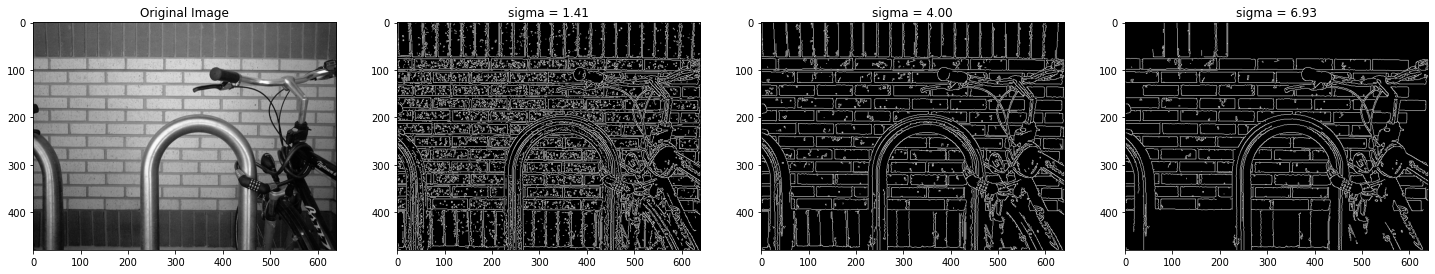

In [4]:
#@title L10_1 Canny_Edge_Detector

# Load image
img = cv2.imread(path_folder+'bike.png')
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Loop over different standard deviations of Gaussian
sigma_array = [np.sqrt(2), np.sqrt(16), np.sqrt(48)]
threshold = 0.15

plt.figure(figsize=(25,10))
plt.subplot(2, 4, 1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
for i, sigma in enumerate(sigma_array):
    # Compute and display Canny edges   
    thre1 = int(threshold * 255)
    thre2 = int(sigma * threshold * 255)
    #print(thre1)
    #print(thre2)
    edges = cv2.Canny(gray,thre1 , thre2)
    plt.subplot(2, 4, i+2), plt.imshow(edges, cmap='gray')
    plt.title(f'sigma = {sigma:.2f}')
    cv2.imwrite(path_folder+f'Canny_Edge_{sigma:.2f}.jpg', edges)
plt.show()




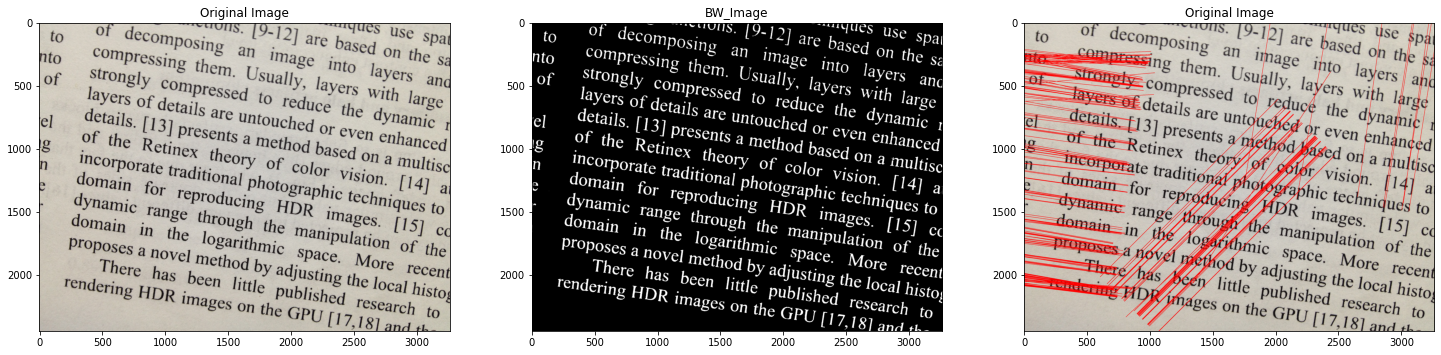

In [23]:
#@title L10_2 Hough_Transform
from scipy.signal import find_peaks
# Load image
img = cv2.imread(path_folder+'article.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Convert image to binary
level, bwImg = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
bwImg = 255 - bwImg

plt.figure(figsize=(25, 15))
plt.subplot(1, 3, 1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(1, 3, 2), plt.imshow(bwImg, cmap='gray'), plt.title('BW_Image')


# Áp dụng Canny Edge Detection để tìm các cạnh
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Thực hiện Hough Transform để tìm các đường thẳng
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)
if lines is not None:
  # Phát hiện tất cả các đỉnh trên hàm Hough để xác định tất cả các đường thẳng
  peaks, _ = find_peaks(np.squeeze(lines[:, :, 0]), height=200)

  # Vẽ các đường thẳng tìm được lên hình ảnh gốc
  for p in peaks:
      rho = lines[p][0][0]
      theta = lines[p][0][1]
      a = np.cos(theta)
      b = np.sin(theta)
      x0 = a*rho
      y0 = b*rho
      x1 = int(x0 + 1000*(-b))
      y1 = int(y0 + 1000*(a))
      x2 = int(x0 - 1000*(-b))
      y2 = int(y0 - 1000*(a))
      cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Hiển thị kết quả
plt.subplot(1, 3, 3), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Detected Lines')
plt.show()

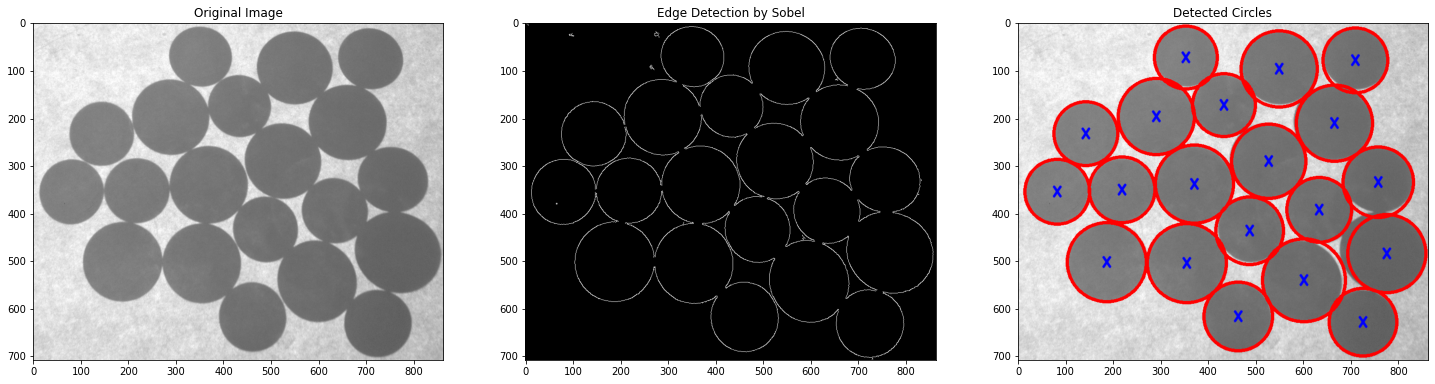

In [8]:
#@title L10_3 Hough Transform for Coins

# Load image
img = cv2.imread(path_folder+'coins.png')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(25, 15))

# Display original image
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# Extract edges using Sobel
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Display edge detection
plt.subplot(1,3, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection by Sobel')
# Find edges with Hough Transform
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1, minDist=100, param1=50, param2=34, minRadius=20, maxRadius=0)

# Convert the (x, y) coordinates and radius of the circles to integers
circles = np.round(circles[0, :]).astype('int')

#print(circles)

# Display image with detected circles
plt.subplot(1,3, 3)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
for (x, y, r) in circles:
    cv2.circle(img, (x, y), r, (0, 0, 255), 5)  
    cv2.putText(img, 'X', (x-10, y+10),cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3, cv2.LINE_AA)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Detected Circles')

plt.show()


True

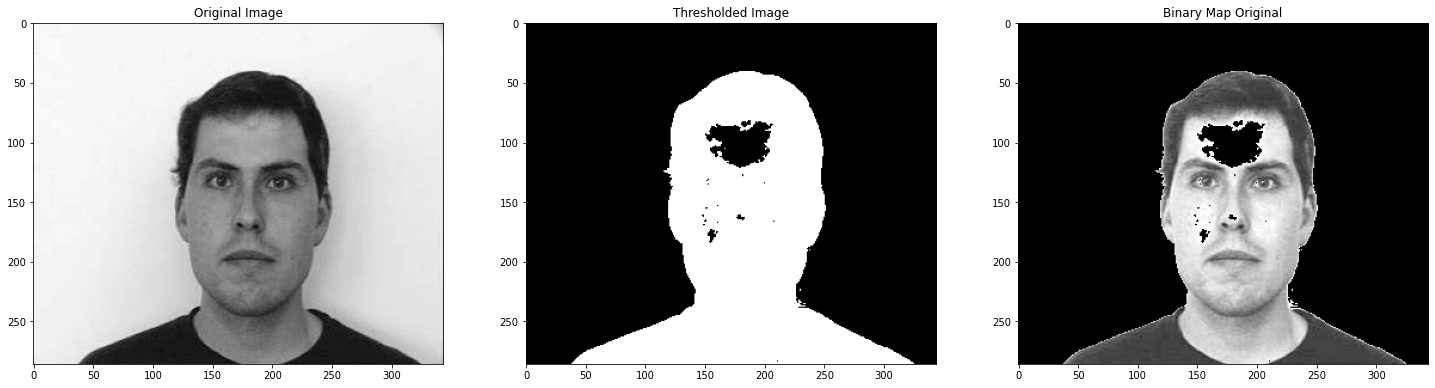

In [9]:
#@title L11_1 Manual Gray_Level Thresholding

#Load image
img = cv2.imread(path_folder+'male.png', 0)

#Define your own threshold value
level = 110 # choose manually
bwImg = img < level
blendedImg = img * np.uint8(bwImg)

#Show image

plt.figure(figsize=(25, 15))
plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 3, 2), plt.imshow(bwImg, cmap='gray'), plt.title('Thresholded Image')
plt.subplot(1, 3, 3), plt.imshow(blendedImg, cmap='gray'), plt.title('Binary Map Original')

#Save images
cv2.imwrite('Gray_Level_Thresholded.png', np.uint8(bwImg)*255)
cv2.imwrite('Gray_Level_Blended.png', blendedImg)

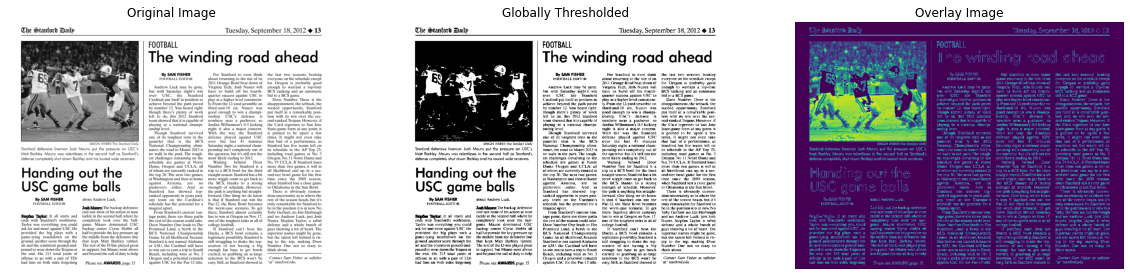

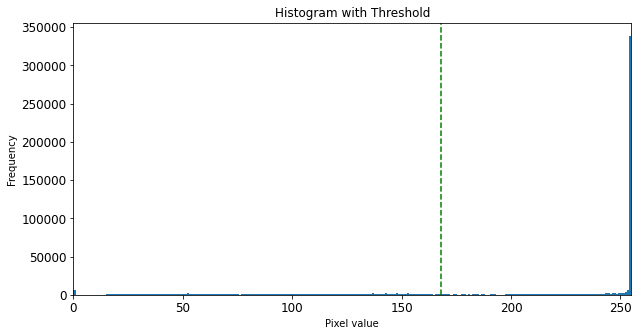

In [10]:
#@title L11_2 Global Gray_Level Thresholding
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage import img_as_float, img_as_ubyte
from skimage.exposure import rescale_intensity

# Load image
Img = rgb2gray(cv2.imread(path_folder+'article.png'))

# Global thresholding by Otsu method
level = threshold_otsu(Img)
bwImg = Img >= level

# Show image
fig, axes = plt.subplots(ncols=3, figsize=(20, 10))
ax0, ax1, ax2 = axes
ax0.imshow(Img, cmap='gray')
ax0.set_title('Original Image')
ax1.imshow(bwImg, cmap='gray')
ax1.set_title('Globally Thresholded')
ax2.imshow((1 - bwImg) * img_as_float(Img))
ax2.set_title('Overlay Image')
for ax in axes:
    ax.axis('off')

# Show histogram of image and threshold value
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(img_as_ubyte(Img).ravel(), bins=256)
ax.axvline(level*255, color='g', linestyle='--')
ax.set_xlim(0, 255)
ax.set_title('Histogram with Threshold')
ax.set_xlabel('Pixel value')
ax.set_ylabel('Frequency')
ax.tick_params(axis='both', labelsize=12)

# Save images
plt.imsave('Global_Thresholding_Binary.png', bwImg, cmap='gray')
plt.savefig('Global_Thresholding_Histogram.png', dpi=300, bbox_inches='tight')


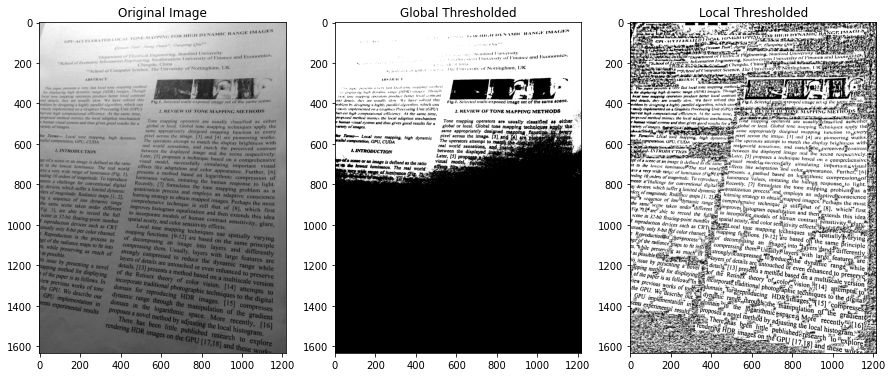

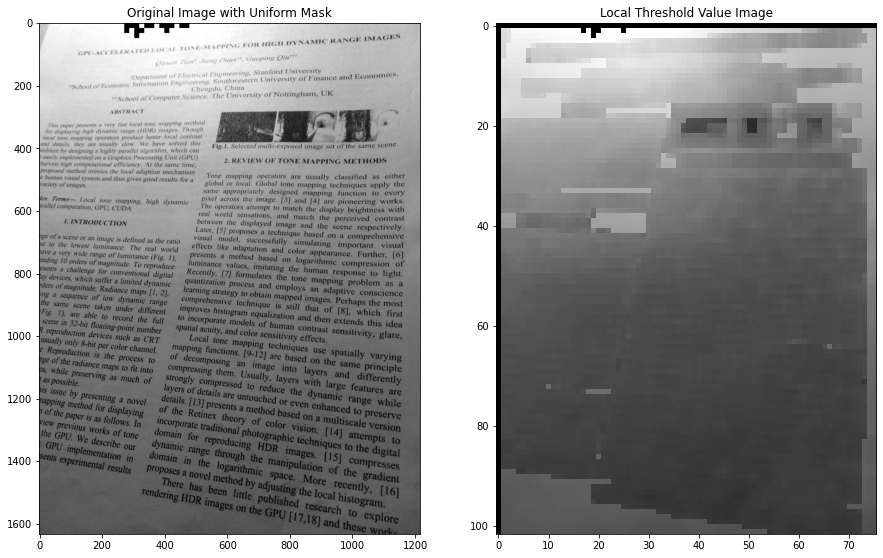

In [82]:
#@title L11_3 Local Adaptive Thresholding

# load image
img_goc = cv2.imread(path_folder+'paper.png')
gray = cv2.cvtColor(img_goc, cv2.COLOR_BGR2GRAY)
gray = cv2.convertScaleAbs(gray)


# global thresholding
level, globalbwImg = cv2.threshold(gray, 0, 1, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# local thresholding
row, col = gray.shape
stepSize = 16
tileSize = 32
varThresh = 0.0005
localbwImg = np.zeros((row, col), dtype=np.uint8)
uniformMask = np.zeros((row, col), dtype=np.uint8)
threshIm = np.zeros((row // stepSize, col // stepSize))

# loop over tiles
for i in range(row // stepSize):
    # get indices for row
    rowStep = slice(i * stepSize, (i + 1) * stepSize)
    rowTile = slice((i - 1) * stepSize, (i + 2) * stepSize)
    if i == row // stepSize:
        rowTile = slice((i - 1) * stepSize, i * stepSize)

    # determine local Otsu's threshold for every single row
    rowThresh, _ = cv2.threshold(gray[rowTile, :], 0, 1, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    for j in range(col // stepSize):
        # get indices for col
        colStep = slice(j * stepSize, (j + 1) * stepSize)
        colTile = slice((j - 1) * stepSize, (j + 2) * stepSize)
        if j == col // stepSize:
            colTile = slice((j - 1) * stepSize, j * stepSize)

        # determine local variance
        step = gray[rowStep, colStep]
        varStep = np.var(step)

        # determine local Otsu's threshold for every single column
        tile = gray[rowTile, colTile]
        localThresh, _ = cv2.threshold(tile, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # convert to bw tile based on local Otsu's threshold
        if varStep > varThresh:
            localbwImg[rowStep, colStep] = cv2.threshold(step, localThresh, 1, cv2.THRESH_BINARY+ cv2.THRESH_OTSU)[1]
            uniformMask[rowStep, colStep] = np.ones((stepSize, stepSize), dtype=np.uint32)
            threshIm[i, j] = localThresh
        else:  # threshold based on local mean
            localMean = np.mean(tile)
            threshIm[i, j] = 0
            if localMean > min(rowThresh, level):
                localbwImg[rowStep, colStep] = np.ones((stepSize, stepSize), dtype=np.uint32)
            else:
                localbwImg[rowStep, colStep] = np.zeros((stepSize, stepSize), dtype=np.uint32)
            uniformMask[rowStep, colStep] = np.zeros((stepSize, stepSize), dtype=np.uint32)



# show images
fig, axs = plt.subplots(1, 3, figsize=(15, 20))
axs[0].imshow(cv2.cvtColor(img_goc, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[1].imshow(globalbwImg, cmap='gray')
axs[1].set_title('Global Thresholded')
axs[2].imshow(localbwImg, cmap='gray')
axs[2].set_title('Local Thresholded')


fig, axs = plt.subplots(1, 2, figsize=(15, 20))
axs[0].imshow(uniformMask * img, cmap='gray')
axs[0].set_title('Original Image with Uniform Mask')
axs[1].imshow(threshIm, cmap='gray')
axs[1].set_title('Local Threshold Value Image')
plt.show()





True

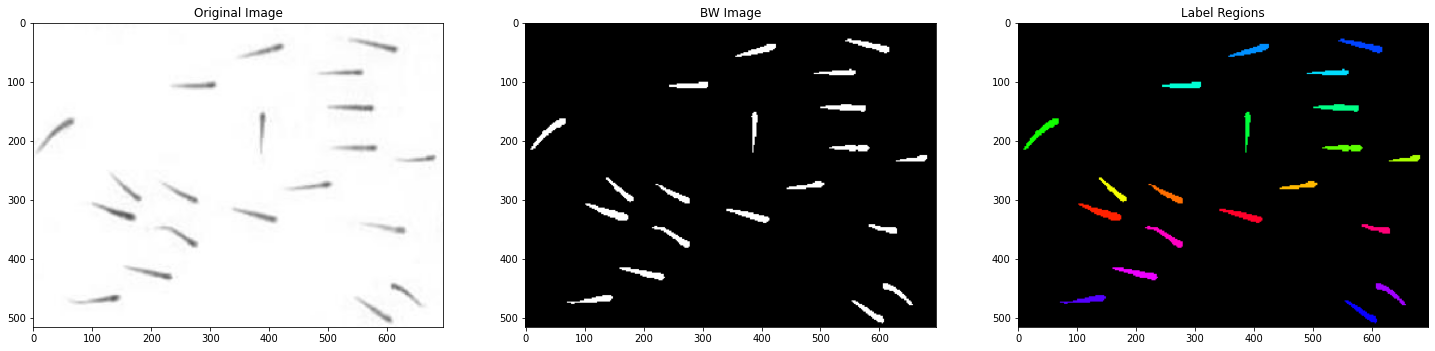

In [35]:
#@title L11_4 Region Labelling

# Load image
Img = cv2.imread(path_folder+'fish.png')

# Binarize image
level, bwImg = cv2.threshold(cv2.cvtColor(Img, cv2.COLOR_BGR2GRAY), 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Label regions in the image
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(bwImg, connectivity=8)

# Create RGB labeled image
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue==0] = 0

# Show images
plt.figure(figsize=(25, 15))
plt.subplot(1, 3, 1), plt.imshow(Img, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 3, 2), plt.imshow(bwImg, cmap='gray'), plt.title('BW Image')
plt.subplot(1, 3, 3), plt.imshow(labeled_img, cmap='gray'), plt.title('Label Regions')

# Save images
cv2.imwrite('Region_Labeling_BW.png', bwImg)
cv2.imwrite('Region_Labeling_RGB.png', labeled_img)
